## Data Visualization - R

### Background

This notebook intends to provide example of basic to advanced data visualization techniques using R. The intention is not to go deep in `ggplot` using a handful of plots and show all the options, rather showcase different graph types and how to generate them.

In [10]:
# Import required packages
library("magrittr")
library("repr")

# Import data to be used for visualization
fileData = paste(getwd(), "/Data/obama-approval-ratings.xls", sep = "")
obama = xlsx::read.xlsx(fileData, sheetIndex = 1, stringsAsFactors = FALSE)

# Examine data
head(obama)

Issue,Approve,Disapprove,None
<chr>,<dbl>,<dbl>,<dbl>
Race Relations,52,38,10
Education,49,40,11
Terrorism,48,45,7
Energy Policy,47,42,11
Foreign Affairs,44,48,8
Environment,43,51,6


### Bar Chart

We use bar chart or bar graph to represent categorical data as the rectangular bars with heights (vertical bar) or lengths (horizontal bar) proportional to the values that they represent. As the definition suggests, bar chart could be either vertical or horizontal.

Here, the categorical variable is issue and can be plotted on *x-axis*. Let's pick Approval Ratings as the measure and plot it on the *y-axis*.

<img src="Images/bar.png">

_Image ref:_ http://ksrowell.com

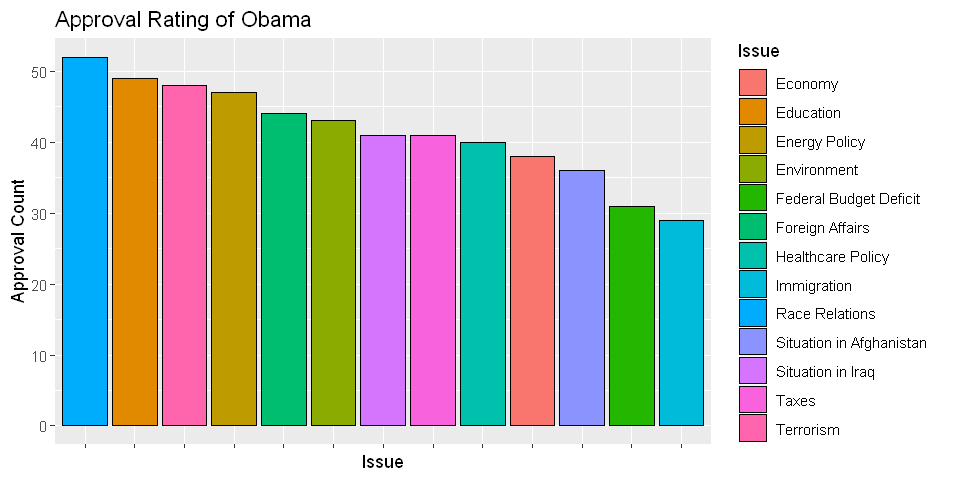

In [20]:
# Set output plot size
options(repr.plot.width=8, repr.plot.height=4)

# Create bar plot
obama %>%
    dplyr::select(Issue, Approve) %>%
    dplyr::arrange(-Approve) %>%
    dplyr::mutate(SortOrder = factor(Issue, Issue)) %>% 
    ggplot2::ggplot(ggplot2::aes(x=SortOrder, y=Approve, fill=Issue)) +
        ggplot2::geom_bar(stat='identity', color='black') + 
        ggplot2::xlab('Issue') + ggplot2::ylab('Approval Count') +
        ggplot2::theme(axis.text.x=ggplot2::element_blank()) +
        ggplot2::ggtitle('Approval Rating of Obama') 

### Stacked Bar Chart

A stacked bar chart is similar to bar chart, but it adds more detail to the visual. It breaks down and compare parts of a whole (category). Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Similar to bar chart, stacked bar chart can also be vertical or horizontal.

Let us plot each issue with their respective Approval, Disapproval and Neutral counts. This will generate a 100% stacked bar chart for each issue, so that the reactions are rightfully captured. 100% stacked bar is just another variant of regular stacked bar where all the measures are normalized as percentage instead of actual value.

<img src="Images/stacked.jpg">

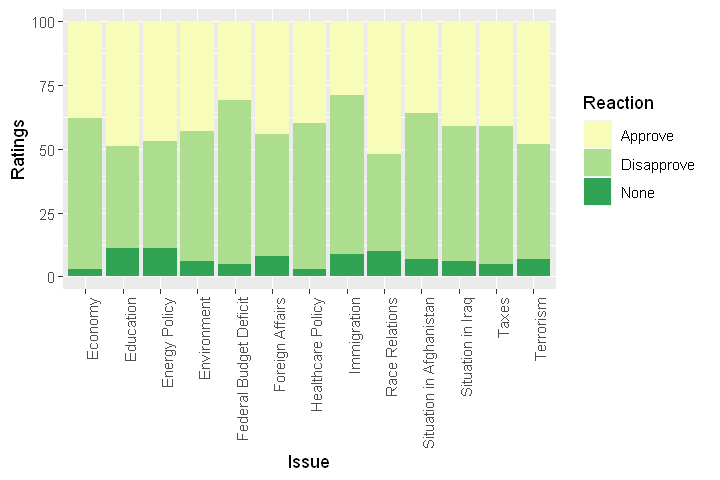

In [24]:
# Set output plot size
options(repr.plot.width=6, repr.plot.height=4)

# We need to reshape the data to long format for this purpose
obama_long = obama %>%
    tidyr::gather('Reaction','Ratings', Approve, Disapprove, None)

# Plot stacked
ggplot2::ggplot(data = obama_long, ggplot2::aes(x = Issue, y = Ratings, fill = Reaction)) + 
    ggplot2:: geom_bar(stat='identity') + 
    ggplot2::theme(axis.text.x = ggplot2::element_text(angle = 90, hjust = 1)) + 
    ggplot2::scale_fill_brewer(palette = 15)

### Pie Chart

A Pie-chart is a useful way of representing small numbers of variables. Particular aspects can be emphasised by exploding or highlighting segments. The pie chart is ideally suited to small numbers of variables, so the number of fill patterns or colours available will rarely be an issue, although the appropriate choice of pattern or colour will be important.

Having said that, processing accurate information based on arc angle and vollume of slice is not easy for human brain. A pie chart could be easily replaced by a stacked bar chart.

Let us consider the numbners of different reactions to the immigration issue during Obama era to demonstrate pie chart.?

<img src="Images/pie.gif">

_image source:_ http://www.agocg.ac.uk/

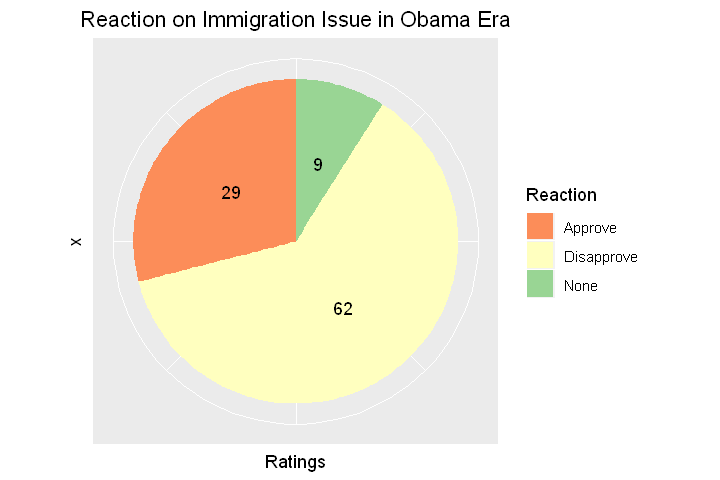

In [33]:
# For this purpose, I would need the long data set. Because we need the stacked chart before creating pie chart from it
# Since pie chart is not easy to digest, I would NOT use the same color family for the different sections
obama_long %>%
    dplyr::filter(Issue=='Immigration') %>%
    ggplot2::ggplot(ggplot2::aes(x="", y=Ratings, fill=Reaction))+
        ggplot2::geom_bar(width = 1, stat = 'identity') +
        ggplot2::coord_polar('y', start=0) + 
        ggplot2::geom_text(ggplot2::aes(label = Ratings), position = ggplot2::position_stack(vjust = 0.5)) +
        ggplot2::ggtitle(label = 'Reaction on Immigration Issue in Obama Era') +
        ggplot2::scale_fill_brewer(palette='Spectral') + 
        ggplot2::theme(axis.line = ggplot2::element_blank(),
          axis.text = ggplot2::element_blank(),
          axis.ticks = ggplot2::element_blank(),
          plot.title = ggplot2::element_text(hjust = 0.5))

### Donut Chart

A donut chart is essentially a pie chart with the center cut out. Donit chart is intended to handle the drawbacks of comparing areas of the slices as in pie chart. Additionally, as in the example, the blank area at the center of the donut chart could be used to show other information.

But still, donut charts do not add anything supirior comapred to stacked bar or bar.

Different reactions on education issues during Obama era is plotted in a rin/donut.

<img src="Images/donut.jpg">

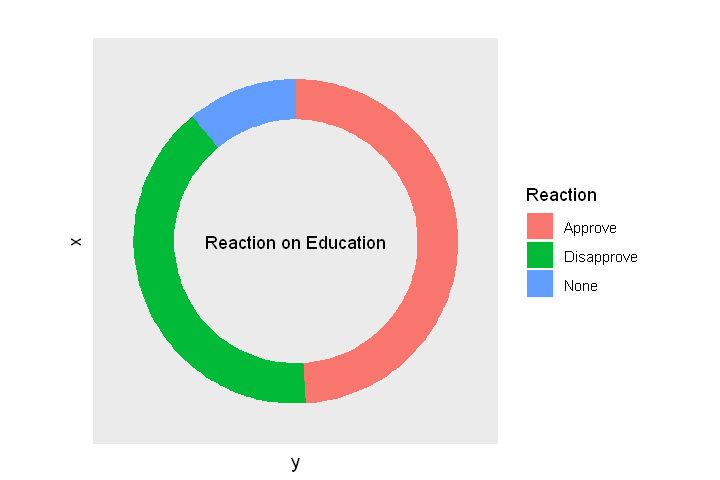

In [32]:
obama_long %>%
    dplyr::filter(Issue=='Education') %>%
    dplyr::mutate(ymax=cumsum(Ratings),
                  ymin=c(0,ymax[1:length(ymax)-1])) %>%
    ggplot2::ggplot(ggplot2::aes(fill=Reaction, ymax=ymax, ymin=ymin, xmax=4, xmin=3)) +
         ggplot2::geom_rect() +
         ggplot2::coord_polar(theta='y') +
         ggplot2::xlim(c(0, 4)) +
         ggplot2::theme(panel.grid=ggplot2::element_blank()) +
         ggplot2::theme(axis.text=ggplot2::element_blank()) +
         ggplot2::theme(axis.ticks=ggplot2::element_blank()) +
         ggplot2::annotate('text', x = 0, y = 0, label = 'Reaction on Education') +
         ggplot2::labs(title='')

### Line Graph

Line graphs are used to track changes over short and long periods of time. When smaller changes exist, line graphs are better to use than bar graphs. Line graphs can also be used to compare changes over the same period of time for more than one group.

For line graph demonstration, let's plot the profit by order year and segment from the famous _Sample Superstores_ dataset. This needs some additional data preparation as below.

<img src="Images/line.gif">

_image source:_ http://www.owlnet.rice.edu

In [36]:
# Import data to be used for visualization
fileData = paste(getwd(), "/Data/Sample - Superstore.xlsx", sep = "")
superstore = xlsx::read.xlsx(fileData, sheetIndex = 1, stringsAsFactors = FALSE)

# Data preparation before plotting in a line graph
superstorePrep = superstore %>% 
                  dplyr::mutate(OrderYear = as.numeric(format(as.Date(Order.Date), '%Y'))) %>% 
                  dplyr::select(OrderYear, Segment, Profit) %>% 
                  dplyr::group_by(OrderYear, Segment) %>% 
                  dplyr::summarise(TotalProfit = sum(Profit))

# Examine data
head(superstorePrep)

OrderYear,Segment,TotalProfit
<dbl>,<chr>,<dbl>
2014,Consumer,24319.85
2014,Corporate,13513.28
2014,Home Office,11710.85
2015,Consumer,28460.17
2015,Corporate,20688.32
2015,Home Office,12470.11


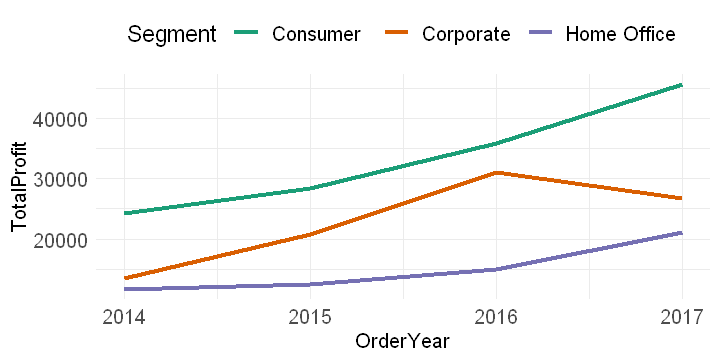

In [39]:
# Set output plot size
options(repr.plot.width=6, repr.plot.height=3)

# Create line plot
ggplot2::ggplot(data=superstorePrep, ggplot2::aes(x=OrderYear, y=TotalProfit, group=Segment)) +
    ggplot2::geom_line(linetype='solid', size=1.2, ggplot2::aes(color=Segment)) +
    ggplot2::scale_color_brewer(palette='Dark2') +
    ggplot2::theme_minimal() +
    ggplot2::theme(legend.position='top', 
                   legend.title=ggplot2::element_text(size=14), 
                   legend.text=ggplot2::element_text(size=12),
                   axis.text=ggplot2::element_text(size=12),
                   axis.title=ggplot2::element_text(size=12)
                  )

### Step Graph

A step graph is a special type of line graph that is made up of lines in several horizontal intervals or 'steps'. The end of the previous horizontal step lies on the same vertical line for the start of the next step, i.e. each new step begins directly above where the previous step finished.

The line graph in the prior segment is displayed as a step graph as below.

<img src="Images/step.png">

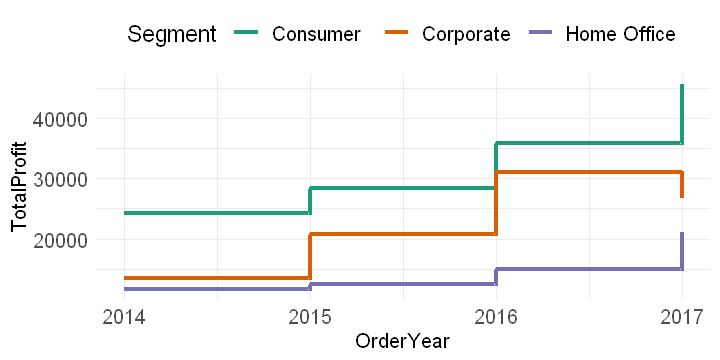

In [46]:
ggplot2::ggplot(data=superstorePrep, ggplot2::aes(x=OrderYear, y=TotalProfit, group=Segment)) +
    ggplot2::geom_step(linetype='solid', size=1.2, ggplot2::aes(color=Segment)) +
    ggplot2::scale_color_brewer(palette='Dark2') +
    ggplot2::theme_minimal() +
    ggplot2::theme(legend.position='top', 
                   legend.title=ggplot2::element_text(size=14), 
                   legend.text=ggplot2::element_text(size=12),
                   axis.text=ggplot2::element_text(size=12),
                   axis.title=ggplot2::element_text(size=12)
                  )

### Tree Map

Treemaps are an alternative way of visualising the hierarchical structure of a Tree Diagram while also displaying quantities for each category via area size. Each category is assigned a rectangle area with their subcategory rectangles nested inside of it. The area size is displayed in proportion to the quantity of a category and to the other quantities within the same parent category in a part-to-whole relationship. Also, the area size of the parent category is the total of its subcategories. If no quantity is assigned to a subcategory, then it's area is divided equally amongst the other subcategories within its parent category.

_Source:_ https://datavizcatalogue.com/methods/treemap.html

<img src="Images/tree1.png">

<img src="Images/tree2.png">

In [72]:
# Load data for tree map
file_expenditures = '/Data/expenditures.txt'
file_unemployement = '/Data/unemployement-rate-1948-2010.csv'

raw_expenditures =  read.table(file_expenditures, header = TRUE)#, sep = '\t', dec = '.', fill = TRUE)

#raw_unemployement = read.csv2(file_unemployement, sep=',', stringsAsFactors = FALSE) %>% 
#    dplyr::mutate(Value = as.numeric(Value)) %>% 
#    as.data.frame()

# Examine data
#print(head(raw_expenditures))
#print(head(raw_unemployement))

Warning message in file(file, "rt"):
"cannot open file '/Data/expenditures.txt': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


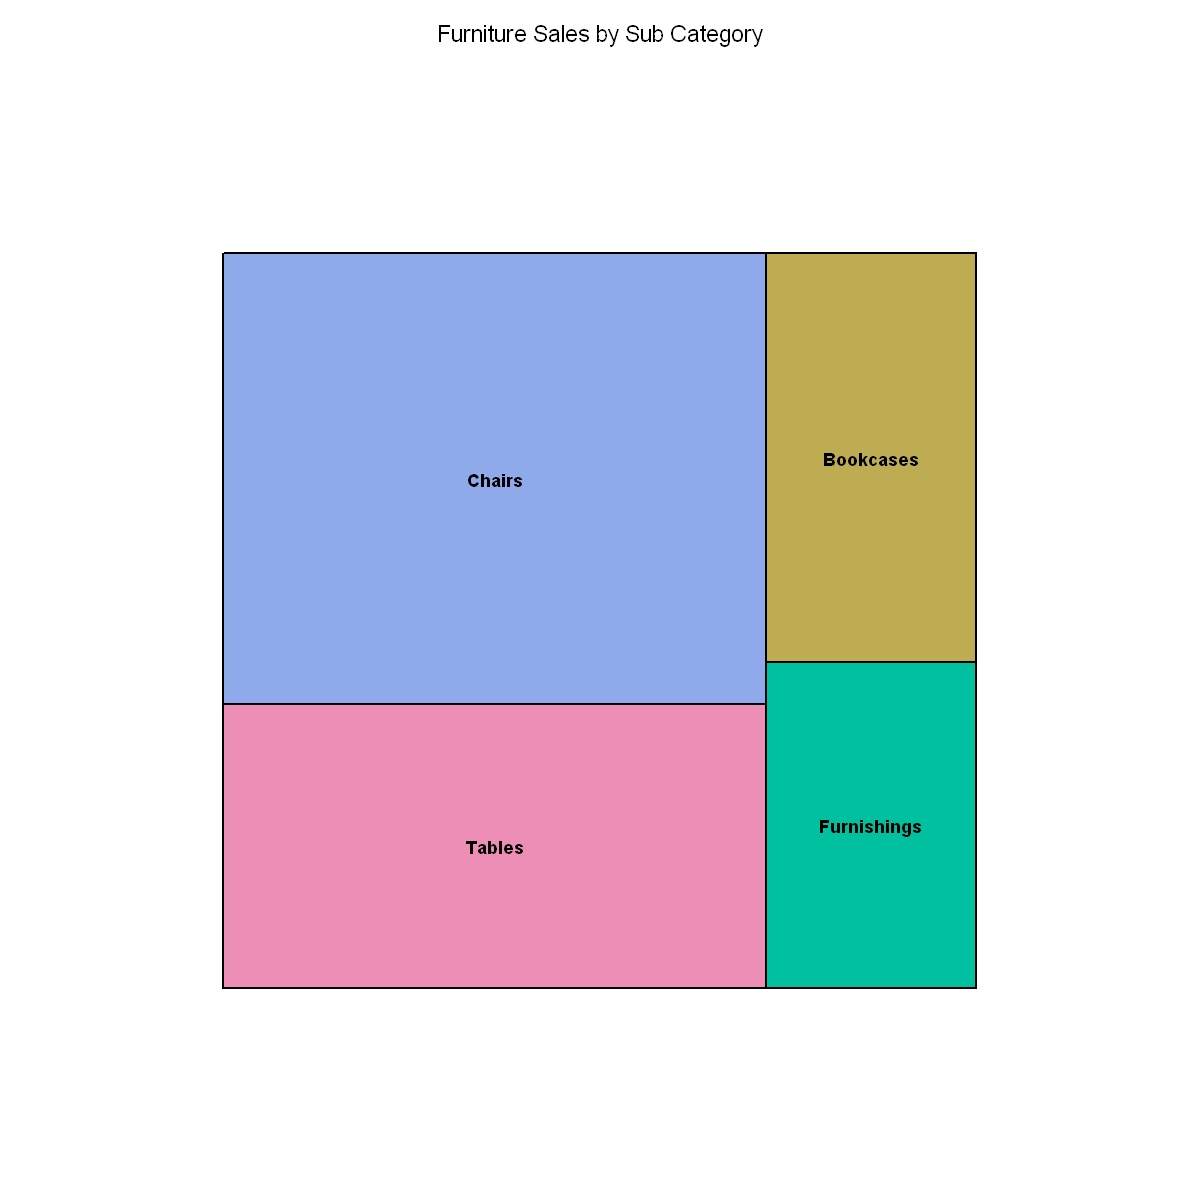

In [66]:
# Set output plot size
options(repr.plot.width=10, repr.plot.height=10)

treemap::treemap(superstore_tree,index = 'Sub.Category',
                 vSize = 'Total Sales',
                 title = 'Furniture Sales by Sub Category')